In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams, cm
from matplotlib import animation
from IPython.display import HTML
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 14

In [2]:
#initial conditions 
nt,nx,s,T = 1001,51,0.1,2
L = numpy.pi
dx = L/(nx-1)
dt = T/(nt-1)
x = numpy.linspace(0, L, nx)
u = numpy.zeros(nx)
u0 = numpy.sin(x)  

In [3]:
def fxt(x,t):
    """solves the solution for f(x,t)
    Parameters:
    ----------
    x:array of float, the position 
    t:float, time
    Returns:
    -------
    fxt: array of float, the solution for f(x,t)
    """
    fxt = numpy.exp(t) * numpy.cos(x) + \
          numpy.exp(t) * numpy.sin(t) + \
          numpy.exp(2*t - s) * numpy.sin(x)**2         
    return fxt

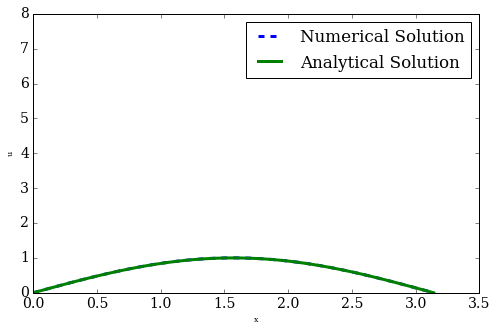

In [4]:
fig = pyplot.figure(figsize=(8,5))
ax = pyplot.axes(xlim=(0,3.5), ylim=(0,8))
line = ax.plot([], [], ls='--', lw=3)[0]
line2 = ax.plot([], [], ls='-', lw=3)[0]
pyplot.xlabel('x', fontsize=8) 
pyplot.ylabel('u', fontsize=8) 
ax.legend(['Numerical Solution','Analytical Solution'])
unt = numpy.zeros((nt+1,nx))
u = u0
def time_delay(n):
    un = u.copy()
    tn = n-int(s/dt)
    u[1:-1] = un[1:-1] + \
              dt/dx**2*(un[2:] - 2*un[1:-1] + un[0:-2]) -\
              dt/dx*(un[2:] - un[1:-1]) + \
              dt*un[1:-1] * (1-unt[tn,1:-1]) + dt*fxt(x,dt*n)[1:-1]                         
    u[0] = 0                                                 
    u[-1] = numpy.exp(dt*n)*numpy.sin(L)                      
    unt[n,:] = u[:]                                         
    u_exact = numpy.exp(n*dt)*numpy.sin(x)   
    line.set_data(x,u)
    line2.set_data(x,u_exact)       
anim = animation.FuncAnimation(fig, time_delay,frames=nt,interval=10)

In [5]:
HTML(anim.to_html5_video())